![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [135]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,221412410,2022-06-15,2020-11-12,1700,Pacific,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,NaN,NaN,NaN,Invest Cont,13600 MARINA POINT DR
1,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
2,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
3,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
4,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV


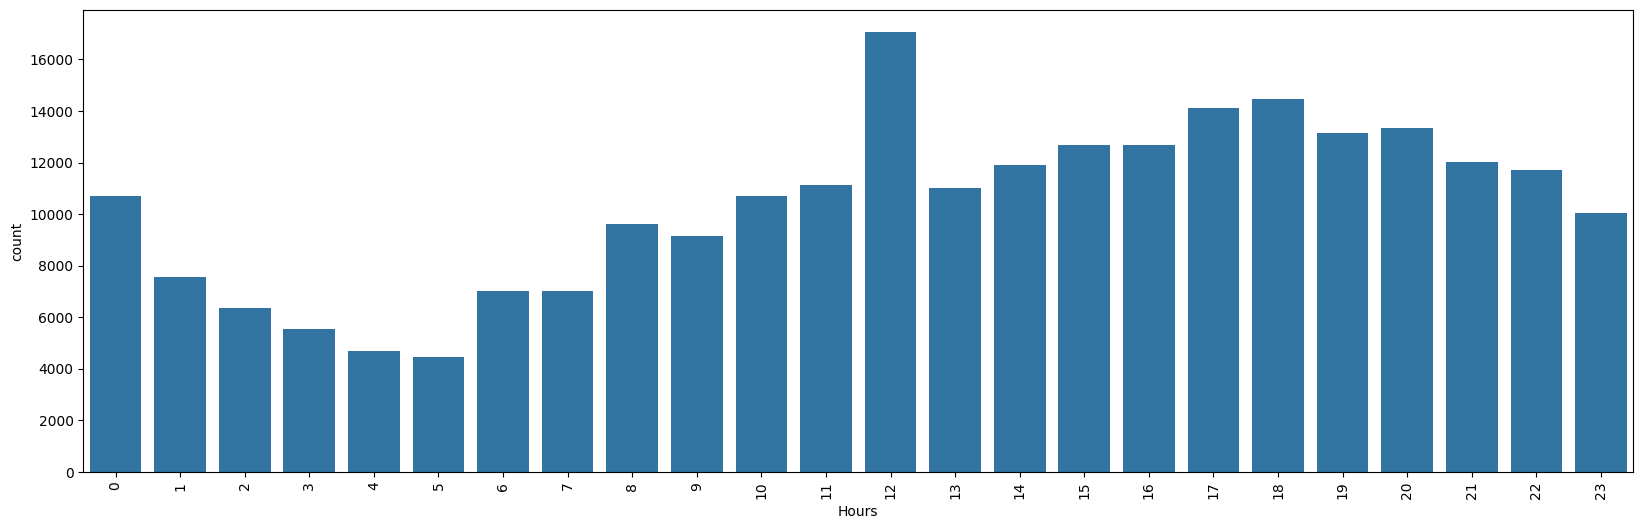

The highest frequency hour of crimes is 12
        DR_NO  Date Rptd  ...                                  LOCATION  Hours
9   231207476 2023-02-27  ...   8800    HAAS                         AV      0
12  221711184 2022-06-15  ...   8300    WHITE OAK                    AV      1
36  221314362 2022-07-11  ...   1600 E  OLYMPIC                      BL      0
39  231307252 2023-03-03  ...                          6600 S  BROADWAY     23
42  221614254 2022-11-13  ...  10200    TELFAIR                      AV      0

[5 rows x 13 columns]
The area with the largest frequency of crimes is Central
The largest area has a frequency count of 4091
            DR_NO  Date Rptd  ...                                  LOCATION  Hours
0       221412410 2022-06-15  ...  13600    MARINA POINT                 DR     17
1       220314085 2022-07-22  ...   2500 S  SYCAMORE                     AV     11
2       222013040 2022-08-06  ...   3300    SAN MARINO                   ST     16
3       220614831 2022-0

In [136]:
# What hour has the highest frequency of crimes?

#Convert to integer and use only the first two digits
crimes['Hours'] = crimes['TIME OCC'].str[:2].astype(int)

#Visualization of the highest hour
plt.figure(figsize=(20,6))
sns.countplot(x='Hours', data=crimes)
plt.xticks(rotation = 90) 
plt.show()

peak_crime_hour = 12
print('The highest frequency hour of crimes is', peak_crime_hour)

#Which Area has the largest frequency of night crimes
crimes['TIME OCC'] = crimes['TIME OCC'].astype(int)

night_crimes = crimes[(crimes['TIME OCC'] >= 2200) | (crimes['TIME OCC'] <= 359)]
print(night_crimes.head())

peak_night_crime_location_counts = night_crimes['AREA NAME'].value_counts()
peak_night_crime_location = peak_night_crime_location_counts.idxmax()

print('The area with the largest frequency of crimes is', peak_night_crime_location)
print('The largest area has a frequency count of', peak_night_crime_location_counts.max())

#Identify the number of crimes committed against victims by age group
age_0_18 = crimes[(crimes['Vict Age'] >= 0) | (crimes['Vict Age'] <= 18)]
print(age_0_18)

age_18_25 = crimes[(crimes['Vict Age'] >= 18) | (crimes['Vict Age'] <= 25)]
print(age_18_25)

age_26_34 = crimes[(crimes['Vict Age'] >= 26) | (crimes['Vict Age'] <= 34)]
print(age_26_34)

age_35_44 = crimes[(crimes['Vict Age'] >= 35) | (crimes['Vict Age'] <= 44)]
print(age_35_44)

age_45_54 = crimes[(crimes['Vict Age'] >= 45) | (crimes['Vict Age'] <= 54)]
print(age_45_54)

age_55_64 = crimes[(crimes['Vict Age'] >= 55) | (crimes['Vict Age'] <= 64)]
print(age_55_64)

age_65_above = crimes[crimes['Vict Age'] >= 65]
print(age_65_above)

#Creating Labels
age_bins = [0,17,25,34, 44,54,64,np.inf]
labels = ['0-18','18-25','26-34','35-44','45-54','55-64','65+']

#Adding a new column to the crimes Df
crimes['Age_groups'] = pd.cut(crimes['Vict Age'],bins = age_bins, labels=labels)
print(crimes['Age_groups'].head())

#Value count of each age group
victim_ages = crimes['Age_groups'].value_counts()
print(victim_ages)